In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, load_img, img_to_array

In [6]:
# Розмір міні-вибірки
batch_size = 128
# Кількість класів зображень
nb_classes = 10
# Кількість епох для навчання
nb_epoch = 25
# Розмір зображень
img_rows, img_cols = 32, 32
# Кількість каналів в зображеннях: RGB
img_channels = 3
# Назви класів із набора даних CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


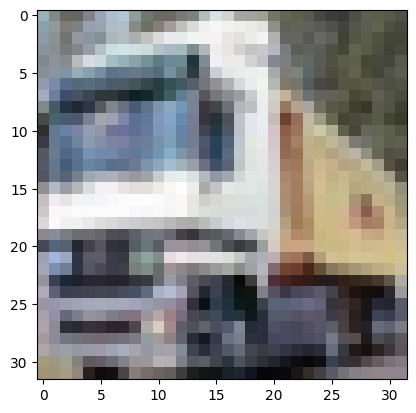

Номер класса: [9]
Тип объекта: грузовик


In [7]:
## Підготовка даних
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [9]:
## Створюємо нейрону мережу
# Створюємо послідовну модель
model = Sequential()

# Перший згортковий шар
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Другий згортковий шар
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Перший шар підвибірки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Шар регуляризації Dropout
model.add(Dropout(0.25))
# Третій згортковий шар
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертий згортковий шар
model.add(Conv2D(64, (3, 3), activation='relu'))
# Другий шар підвибірки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Шар регуляризації Dropout
model.add(Dropout(0.25))
# Шар перетворення даних із 2D-представлення в плоске
model.add(Flatten())
# Повнозв’язний шар для класифікації
model.add(Dense(512, activation='relu'))
# Шар регуляризації Dropout
model.add(Dropout(0.5))
# Вихідний повнозв’язний шар
model.add(Dense(nb_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,842 (6.40 MB)

 Trainable params: 1,676,842 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
## Навчаємо нейрону мережу
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

## Оцінюємо якість навчання мережі
# Оцінюємо якість моделі на тестових даних
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Epoch 1/25
352/352 - 19s - 53ms/step - accuracy: 0.4126 - loss: 1.5941 - val_accuracy: 0.5518 - val_loss: 1.2394
Epoch 2/25
352/352 - 7s - 21ms/step - accuracy: 0.5681 - loss: 1.2067 - val_accuracy: 0.6512 - val_loss: 0.9934
Epoch 3/25
352/352 - 3s - 10ms/step - accuracy: 0.6342 - loss: 1.0226 - val_accuracy: 0.7002 - val_loss: 0.8534
Epoch 4/25
352/352 - 5s - 14ms/step - accuracy: 0.6770 - loss: 0.9086 - val_accuracy: 0.7194 - val_loss: 0.8071
Epoch 5/25
352/352 - 5s - 15ms/step - accuracy: 0.7083 - loss: 0.8267 - val_accuracy: 0.7444 - val_loss: 0.7464
Epoch 6/25
352/352 - 3s - 9ms/step - accuracy: 0.7290 - loss: 0.7599 - val_accuracy: 0.7588 - val_loss: 0.7012
Epoch 7/25
352/352 - 3s - 9ms/step - accuracy: 0.7512 - loss: 0.7062 - val_accuracy: 0.7534 - val_loss: 0.7092
Epoch 8/25
352/352 - 3s - 10ms/step - accuracy: 0.7661 - loss: 0.6621 - val_accuracy: 0.7738 - val_loss: 0.6533
Epoch 9/25
352/352 - 5s - 15ms/step - accuracy: 0.7791 - loss: 0.6275 - val_accuracy: 0.7832 - val_loss: 

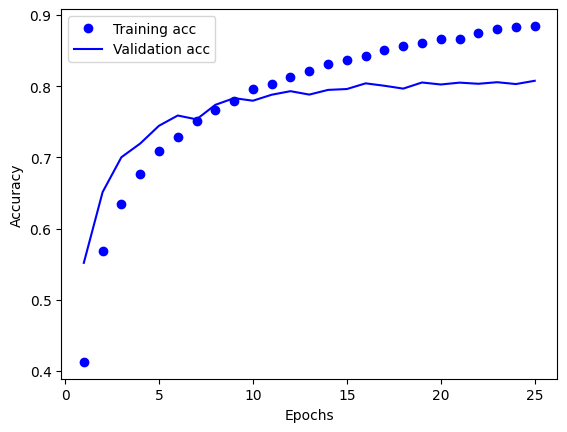

In [13]:
##Показуємо два графіка: точність на навчальній та тестовій виборках (по епохах)
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Зберігаємо нейрону мережу
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.weights.h5")

In [14]:
!ls

cifar10_model.json  cifar10_model.weights.h5  sample_data


In [17]:
from google.colab import files
files.download("cifar10_model.json")
files.download("cifar10_model.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
f1=files.upload()

Saving cifar10_model.json to cifar10_model (1).json


In [21]:
f2=files.upload()

Saving cifar10_model.weights.h5 to cifar10_model.weights (1).h5


In [27]:
# Відкриваємо модель
from tensorflow.keras.models import model_from_json
json_file=open("cifar10_model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_model.weights.h5")

In [28]:
#Компілюємо модель
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

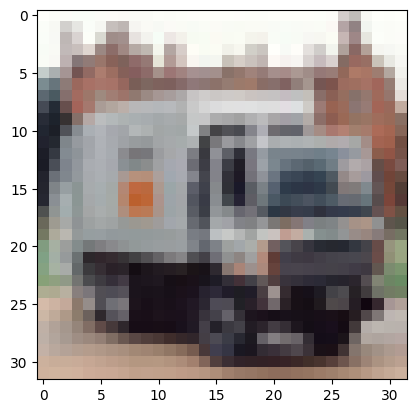

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
[[3.26161949e-12 2.44374920e-08 4.52867026e-17 3.61656698e-17
  6.93061273e-21 3.48070784e-20 1.73205843e-19 1.08325075e-17
  2.10525939e-14 1.00000000e+00]]


In [29]:
## Використовуємо мережу для розпізнавання об’єктів на зображеннях
index=11
plt.imshow(X_test[index])
plt.show()

x = X_test[index]
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)

print(prediction)

самолет
грузовик


Saving plain.jpg to plain.jpg
'cifar10_model (1).json'  'cifar10_model.weights (1).h5'   plain.jpg
 cifar10_model.json	   cifar10_model.weights.h5	   sample_data


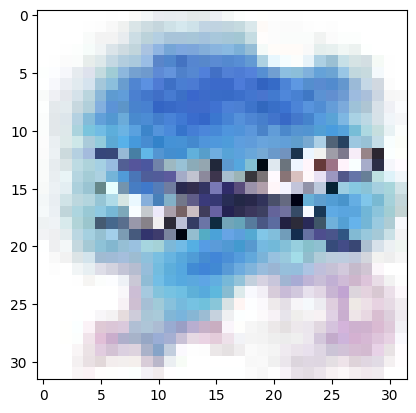

In [31]:
prediction = np.argmax(prediction)

print(classes[prediction])
print(classes[y_test[index][0]])

## Розпізнаємо додаткове зображення
from google.colab import files
files.upload()
##Перевіряємо загрузку файлів
!ls

img_path = 'plain.jpg'
img = load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()


In [32]:
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [33]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
самолет


In [47]:
!pip install transformers sentencepiece sacremoses
from transformers import pipeline

In [48]:
classifier = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")
results = classifier("It's right to work and do what you love")
results

Device set to use cuda:0


[{'label': 'approval', 'score': 0.6733773946762085}]

In [37]:
classifier("It's right to work and do what you love", return_all_scores=True)

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'admiration', 'score': 0.045877669006586075},
  {'label': 'amusement', 'score': 0.0009115965222008526},
  {'label': 'anger', 'score': 0.0018904228927567601},
  {'label': 'annoyance', 'score': 0.0042712753638625145},
  {'label': 'approval', 'score': 0.6733773946762085},
  {'label': 'caring', 'score': 0.030202236026525497},
  {'label': 'confusion', 'score': 0.0016259042313322425},
  {'label': 'curiosity', 'score': 0.0038929362781345844},
  {'label': 'desire', 'score': 0.0064261723309755325},
  {'label': 'disappointment', 'score': 0.0014256625436246395},
  {'label': 'disapproval', 'score': 0.004064163658767939},
  {'label': 'disgust', 'score': 0.0010687668109312654},
  {'label': 'embarrassment', 'score': 0.000301339227007702},
  {'label': 'excitement', 'score': 0.00799411442130804},
  {'label': 'fear', 'score': 0.0008411950548179448},
  {'label': 'gratitude', 'score': 0.0017911633476614952},
  {'label': 'grief', 'score': 0.0003501872706692666},
  {'label': 'joy', 'score': 0.00

In [39]:
translator = pipeline("translation_en_to_bg", model="Helsinki-NLP/opus-mt-en-bg")
results = translator("I am working at the University")
results

Device set to use cuda:0


[{'translation_text': 'Работя в университета'}]

In [46]:
generator = pipeline('text-generation')
results = generator("At the University I am conducting research in the field", max_length = 50)
results

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'At the University I am conducting research in the field of "What makes a nice game?" and "Tiny Dungeon Crawl, The Art of Making a Great Game" - and we\'ve been fortunate enough to do a bit more than simply talk about'}]

In [45]:
qa_model = pipeline("question-answering")
context="""My name is Victoria Ruvinskaya. I work at Odessa National Polytechnic University. I teach two disciplines: 1) Artificial Intelligence and Machine Learning and 2) Functional Programming"""
question="How many discipline Victoria Ruvinskaya teaches?"
results = qa_model(question = question, context = context)
results

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'score': 0.6980934739112854, 'start': 90, 'end': 93, 'answer': 'two'}

In [44]:
classifier = pipeline("ner")
results = classifier("My name is Victoria Ruvinskaya. I work at the University")
results

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity': 'I-PER',
  'score': np.float32(0.9989183),
  'index': 4,
  'word': 'Victoria',
  'start': 11,
  'end': 19},
 {'entity': 'I-PER',
  'score': np.float32(0.99883133),
  'index': 5,
  'word': 'R',
  'start': 20,
  'end': 21},
 {'entity': 'I-PER',
  'score': np.float32(0.9549828),
  'index': 6,
  'word': '##u',
  'start': 21,
  'end': 22},
 {'entity': 'I-PER',
  'score': np.float32(0.9880067),
  'index': 7,
  'word': '##vin',
  'start': 22,
  'end': 25},
 {'entity': 'I-PER',
  'score': np.float32(0.99886155),
  'index': 8,
  'word': '##skaya',
  'start': 25,
  'end': 30},
 {'entity': 'I-ORG',
  'score': np.float32(0.76344657),
  'index': 14,
  'word': 'University',
  'start': 46,
  'end': 56}]